In [0]:
import pandas as pd
import datetime
from datetime import timedelta, datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame
from pandas.plotting import scatter_matrix
import math
import numpy as np

from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl

!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

dataId = '1N-mGn2_1Dgi13ZdHGCLv1VjjAv6Ff61k'

In [92]:

#start = datetime.datetime(1996, 1, 1)
#end = datetime.datetime(2019, 1, 1)

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

downloaded = drive.CreateFile({'id':dataId}) 
downloaded.GetContentFile('DataSet.csv')  

df = pd.read_csv('DataSet.csv')
#df = web.DataReader("IBM", 'yahoo', start, end)
#df.sort_index()
df.set_index('Date', inplace=True)
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-08-26,131.050003,131.300003,129.160004,129.990005,129.990005,2833900
2019-08-27,131.199997,131.699997,130.309998,131.169998,131.169998,4728000
2019-08-28,130.440002,132.889999,130.039993,132.759995,132.759995,2713600
2019-08-29,134.179993,135.690002,134.039993,134.880005,134.880005,2971800
2019-08-30,135.580002,136.070007,134.360001,135.529999,135.529999,2960600


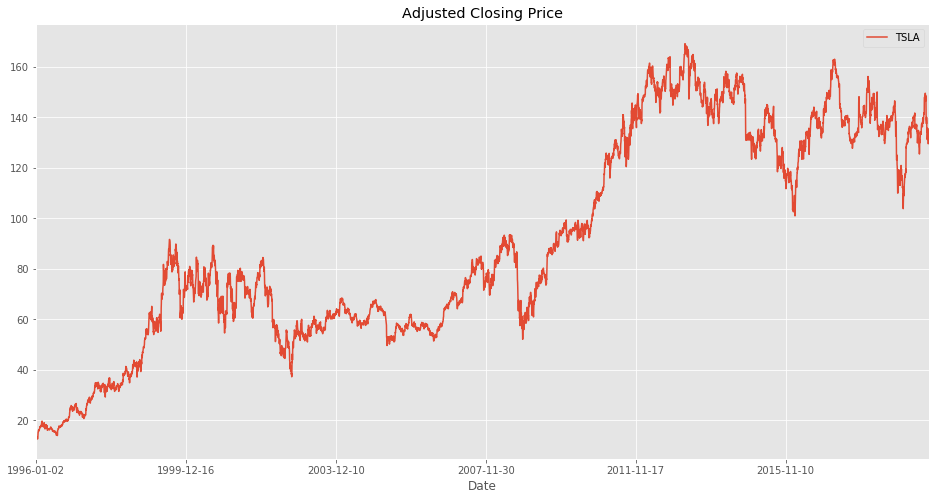

In [93]:
df['Adj Close'].plot(label='TSLA', figsize=(16,8), title='Adjusted Closing Price', grid=True, legend=True)


In [0]:
#df.dropna(inplace=True)


In [0]:
window_size = 32 # Allow us to look at 32 days into the past
# Prepare the data so that we have 32 day windows and predict what the next day should be

# Get indices of access for the data
num_samples = len(df) - window_size
indices = np.arange(num_samples).astype(np.int)[:,None] + np.arange(window_size + 1).astype(np.int)

In [0]:
data = df['Adj Close'].values[indices] # Create the 2D matrix of training samples

In [0]:
X = data[:,:-1] # Each row represents 32 days in the past
y = data[:,-1] # Each output value represents the 33rd day

In [102]:
# Train and test split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
# Train and test split
split_fraction = 0.8
ind_split = int(split_fraction * num_samples)
X_train = X[:ind_split]
y_train = y[:ind_split]
X_test = X[ind_split:]
y_test = y[ind_split:]

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4740, 32)
(1186, 32)
(4740,)
(1186,)


# Ridge Regression

In [0]:
# Train
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)

# Infer
y_pred_train_ridge = ridge_model.predict(X_train)
y_pred_ridge = ridge_model.predict(X_test)

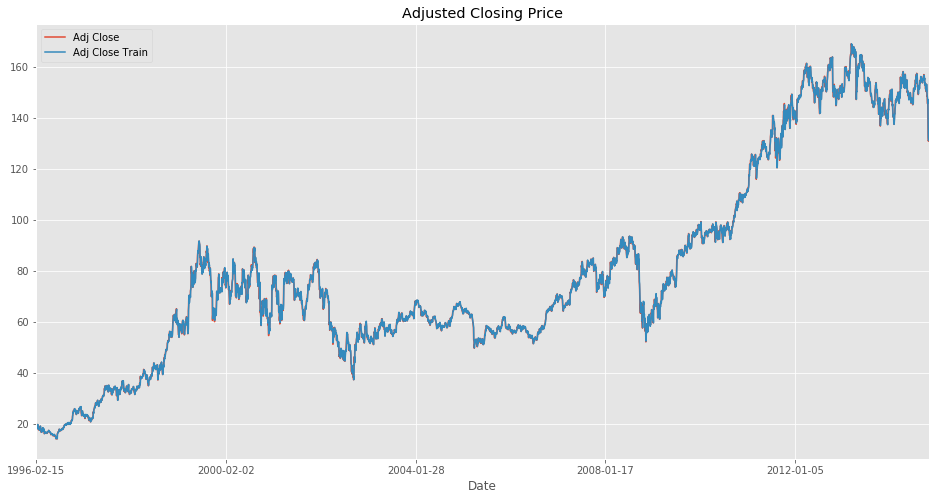

In [107]:
# Plot what it looks like for the training data
df_ridge = df.copy()
df_ridge.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_ridge = df_ridge.iloc[window_size:ind_split] # Past 32 days we don't know yet
df_ridge['Adj Close Train'] = y_pred_train_ridge[:-window_size]
df_ridge.plot(label='TSLA', figsize=(16,8), title='Adjusted Closing Price', grid=True)

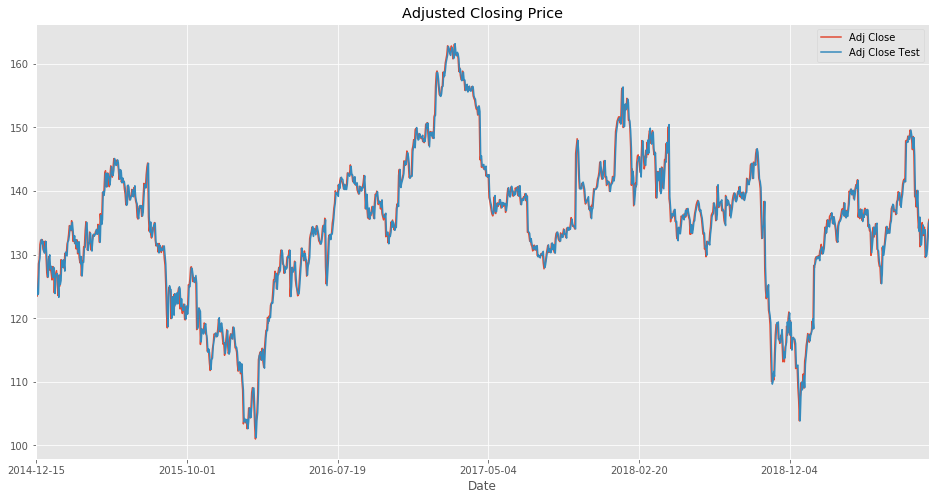

In [109]:
# Same for the test
df_ridge = df.copy()
df_ridge.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_ridge = df_ridge.iloc[ind_split+window_size:] # Past 32 days we don't know yet
df_ridge['Adj Close Test'] = y_pred_ridge
df_ridge.plot(label='TSLA', figsize=(16,8), title='Adjusted Closing Price', grid=True)

# Bayesian Ridge

In [0]:
# Model #2 - Gradient Boosting Trees
br_model = BayesianRidge()
br_model.fit(X_train, y_train)

# Infer
y_pred_train_br = br_model.predict(X_train)
y_pred_br = br_model.predict(X_test)

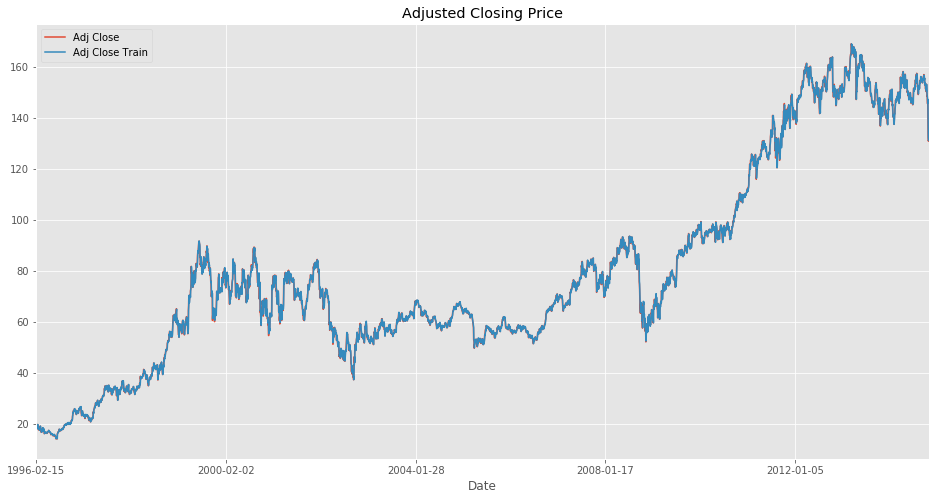

In [121]:
# Plot what it looks like for the training data
df_br = df.copy()
df_br.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_br = df_br.iloc[window_size:ind_split] # Past 32 days we don't know yet
df_br['Adj Close Train'] = y_pred_train_br[:-window_size]
df_br.plot(label='TSLA', figsize=(16,8), title='Adjusted Closing Price', grid=True)

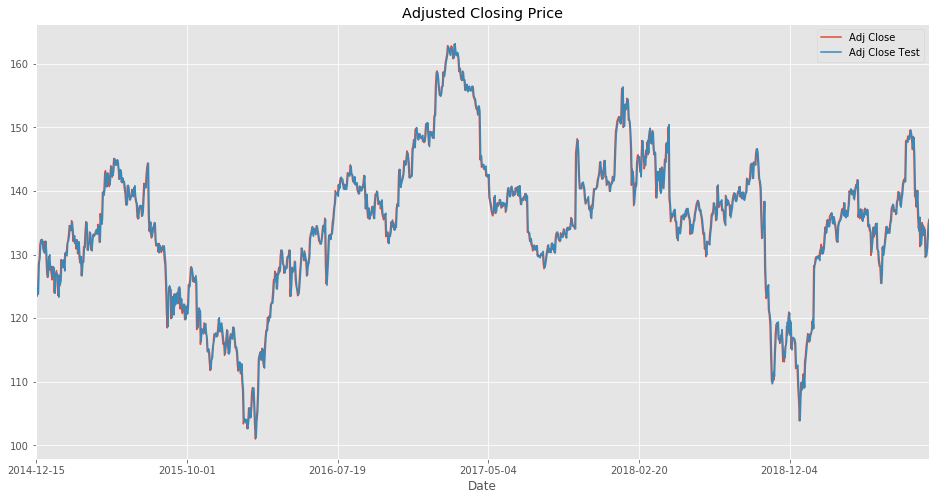

In [124]:
# Same for the test
df_br = df.copy()
df_br.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_br = df_br.iloc[ind_split+window_size:] # Past 32 days we don't know yet
df_br['Adj Close Test'] = y_pred_br
df_br.plot(label='TSLA', figsize=(16,8), title='Adjusted Closing Price', grid=True)

# Gradient Boosting Trees

In [0]:
# Model #2 - Gradient Boosting Trees
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)

# Infer
y_pred_train_gb = gb_model.predict(X_train)
y_pred_gb = gb_model.predict(X_test)

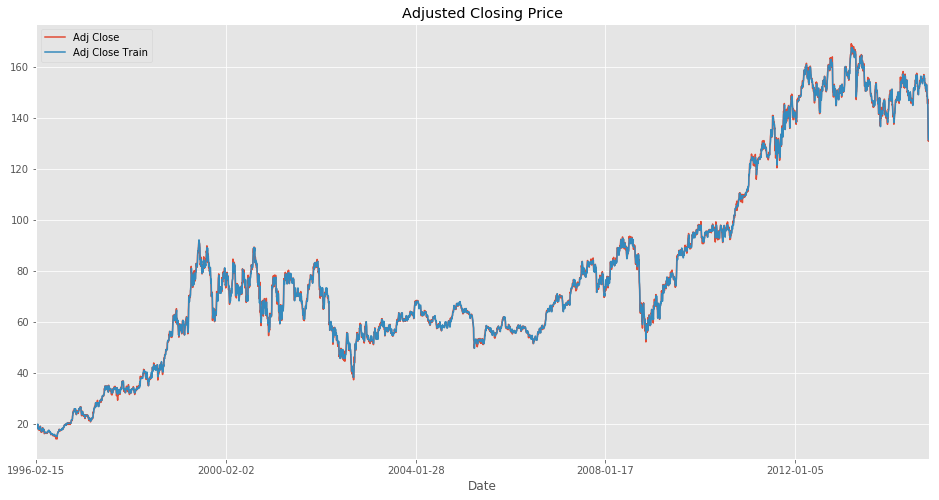

In [128]:
# Plot what it looks like for the training data
df_gb = df.copy()
df_gb.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_gb = df_gb.iloc[window_size:ind_split] # Past 32 days we don't know yet
df_gb['Adj Close Train'] = y_pred_train_gb[:-window_size]
df_gb.plot(label='TSLA', figsize=(16,8), title='Adjusted Closing Price', grid=True)

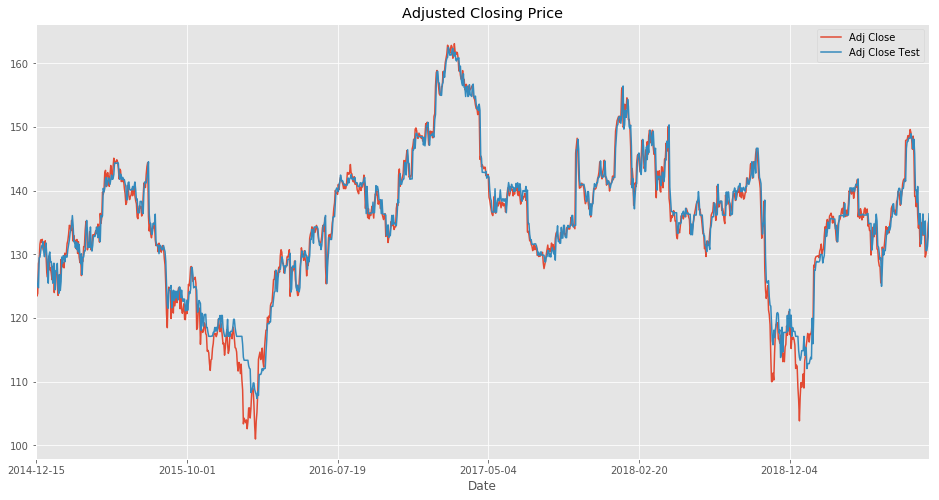

In [129]:
# Same for the test
df_gb = df.copy()
df_gb.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_gb = df_gb.iloc[ind_split+window_size:] # Past 32 days we don't know yet
df_gb['Adj Close Test'] = y_pred_gb
df_gb.plot(label='TSLA', figsize=(16,8), title='Adjusted Closing Price', grid=True)

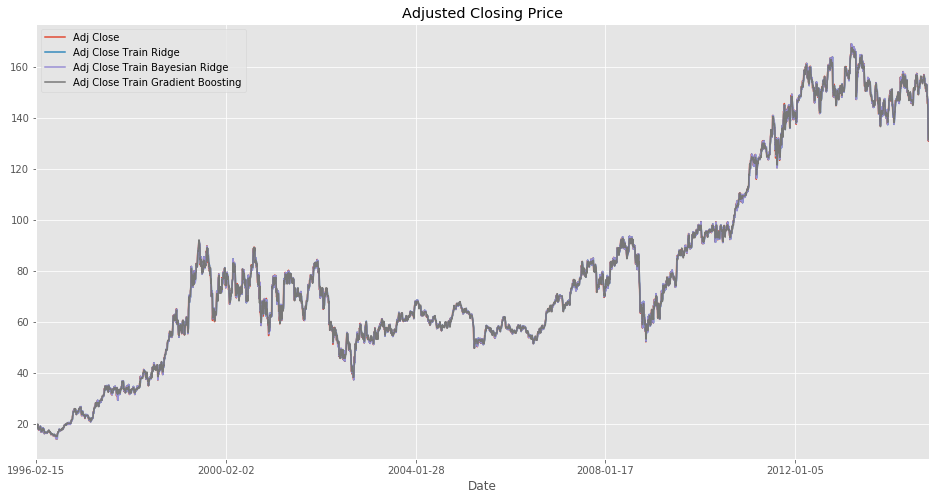

In [131]:
df_train = df.copy()
df_train.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_train = df_train.iloc[window_size:ind_split] # Past 32 days we don't know yet
# Add in all of our methods
df_train['Adj Close Train Ridge'] = y_pred_train_ridge[:-window_size]
df_train['Adj Close Train Bayesian Ridge'] = y_pred_train_br[:-window_size]
df_train['Adj Close Train Gradient Boosting'] = y_pred_train_gb[:-window_size]
# Plot the data now
df_train.plot(label='TSLA', figsize=(16,8), title='Adjusted Closing Price', grid=True)

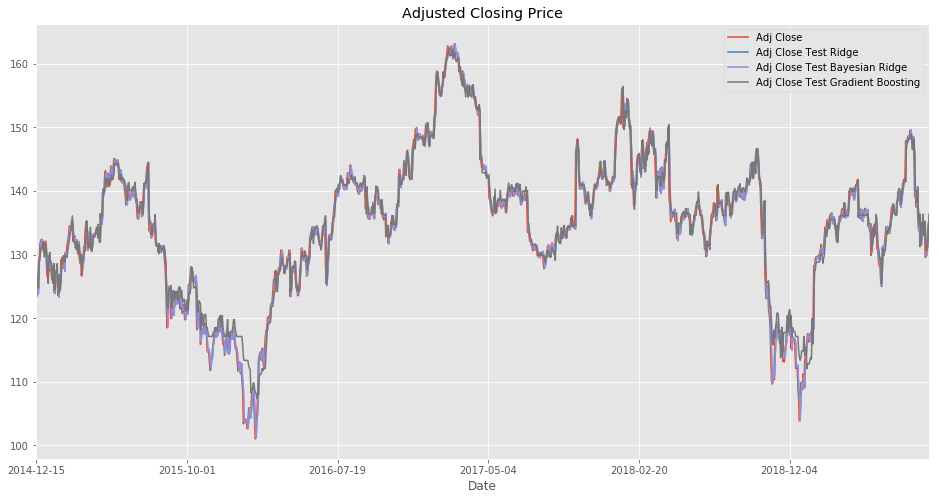

In [132]:
df_test = df.copy()
df_test.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_test = df_test.iloc[ind_split+window_size:] # Past 32 days we don't know yet
# Add in all of our methods
df_test['Adj Close Test Ridge'] = y_pred_ridge
df_test['Adj Close Test Bayesian Ridge'] = y_pred_br
df_test['Adj Close Test Gradient Boosting'] = y_pred_gb
# Plot the data now
df_test.plot(label='TSLA', figsize=(16,8), title='Adjusted Closing Price', grid=True)

In [0]:
num_days = 10 # Let's try and forecase the next 10 days or two years

# Get the last window_size (32) days
data_seed = df['Adj Close'].values[-window_size:][None]
input_values = {"ridge": data_seed, "gb": data_seed, "br": data_seed}
values = {"ridge": [], "gb": [], "br": []}
for i in range(num_days): # For each day...
    # Predict the next price given the previous N prices
    values["ridge"].append(ridge_model.predict(input_values["ridge"])[0])
    values["gb"].append(gb_model.predict(input_values["gb"])[0])
    values["br"].append(br_model.predict(input_values["br"])[0])

    # Dump the oldest price and put the newest price at the end
    for v in input_values:
        val = input_values[v]
        val = np.insert(val, -1, values[v][-1], axis=1)
        val = np.delete(val, 0, axis=1)
        input_values[v] = val.copy()

# Convert all to NumPy arrays
for v in input_values:
    values[v] = np.array(values[v])

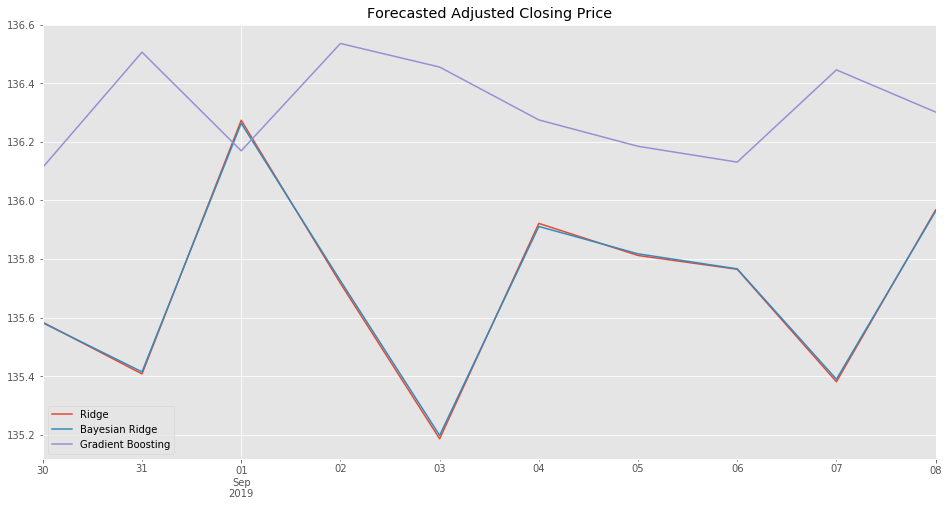

In [143]:
last_date = datetime.strptime(df.index[-1], '%Y-%m-%d')
df_forecast = pd.DataFrame()
df_forecast["Ridge"] = values["ridge"]
df_forecast["Bayesian Ridge"] = values["br"]
df_forecast["Gradient Boosting"] = values["gb"]
df_forecast.index = pd.date_range(start=last_date, periods=num_days)
df_forecast.plot(label='TSLA', figsize=(16,8), title='Forecasted Adjusted Closing Price', grid=True)